# Introduction to Numerical Integration in Python

When calculating distances in our expanding Universe, we often encounter integrals that have no easy analytic solution. This notebook provides a quick introduction to computing integrals numerically in python. Along the way, we'll introduce some numerical methods and key concepts in the python computing language. Note that all of the cells in this notebook, including this "markdown"-type cell, are editable. Feel free to experiment - it's the best way to learn your way around!

After completing this notebook, you should be able to
1. Read, edit, and begin writing short python scripts in the JupyterHub environment
2. Compute numeric integrals in a few different ways
3. Use plotting functionality in python

## Essential tools: importing modules, functions, print statements, and plotting

In the cell below, we show how to import python modules. The python language has many useful, well documented, and well supported modules which extend the functionality of the language. Many of these modules have become standard tools in scientific computing.

Here we'll use the numeric python [numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html) module, as well as the [pylab](https://matplotlib.org/tutorials/index.html) plotting module.

In [1]:
# This is comment used to annotate our code

import numpy as np # Use the "np" alias for short
import pylab

pylab.ion() # To enable interactive plotting in the notebook

Numpy arrays are very powerful objects because they enable vectorized math operations. It's easiest to see the power of numpy arrays with a few examples. We'll use the `print` statement to output the results in ascii characters.

In [2]:
a = np.array([1, 1, 2, 3, 5]) # create custom array by inputing the values by hand - do you recognize the pattern?
b = np.arange(5) # numpy also has functions for quickly creating arrays
print(a)
print(b)
print(a + 1)
print(2 * a)
print(b**2)
print(a + b)

[1 1 2 3 5]
[0 1 2 3 4]
[2 2 3 4 6]
[ 2  2  4  6 10]
[ 0  1  4  9 16]
[1 2 4 6 9]


Consider the simple mathematical function $f(x) = x^2$. In python, we can define a function as follows:

In [3]:
def myFunction(x):
    """
    Here's my first function. 
    The three quote makes indicate a block comment.
    """
    return x**2

See our function in action.

In [4]:
print(myFunction(5))

25


Let's evaluate and plot our function for some range of x-values.

In [5]:
# Create a numpy array with 21 equally spaced steps between -5 and 5
x = np.linspace(-5, 5, 21) 
print("x-values")
print(x)

print("y-values")
y = myFunction(x)
print(y)

x-values
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y-values
[25.   20.25 16.   12.25  9.    6.25  4.    2.25  1.    0.25  0.    0.25
  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


By the way, if you encounter an unfamiliar object, you can use the `help` function to see documentation. Uncomment the following line to see the documentation for the `np.linspace` function.

In [6]:
#help(np.linspace)

In addition, you can find out the type of object with the `type` function.

In [7]:
type(x)

numpy.ndarray

Here's how one might make a `for` loop and index the individual elements of the array. Note that we have also used a more sophisticated syntax for the `print` statement argument that makes a nicer display. 

In [8]:
print('%10s%10s'%('x', 'y'))
for ii in range(0, len(x)):
    print('%10.2f%10.2f'%(x[ii], y[ii]))

         x         y
     -5.00     25.00
     -4.50     20.25
     -4.00     16.00
     -3.50     12.25
     -3.00      9.00
     -2.50      6.25
     -2.00      4.00
     -1.50      2.25
     -1.00      1.00
     -0.50      0.25
      0.00      0.00
      0.50      0.25
      1.00      1.00
      1.50      2.25
      2.00      4.00
      2.50      6.25
      3.00      9.00
      3.50     12.25
      4.00     16.00
      4.50     20.25
      5.00     25.00


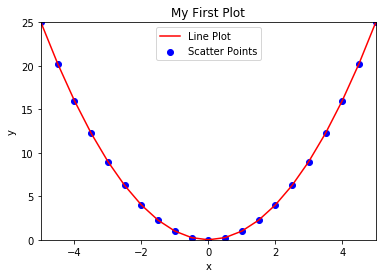

In [9]:
pylab.figure()
pylab.plot(x, y, c='Red', label='Line Plot')
pylab.scatter(x, y, c='Blue', label='Scatter Points')
pylab.xlim(-5, 5)
pylab.ylim(0, 25)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('My First Plot')
pylab.legend(loc='upper center')


## Analytic Integrals

Let's start by evaluating the integral analytically. In pratice, we usually use numeric integrals for situations when the integral is difficult to evaluate analytically. For instructional purposes though, it will be useful to compare to the exact answer.

The definite integral of our function is 

$\int_a^b f(x) dx = \int_a^b x^2 dx = \frac{1}{3} x^3 |_a^b = \frac{1}{3}(b^3 - a^3)$ 

In [10]:
def analyticIntegral(a, b):
    return (1/3.) * (b**3 - a**3)

24.0


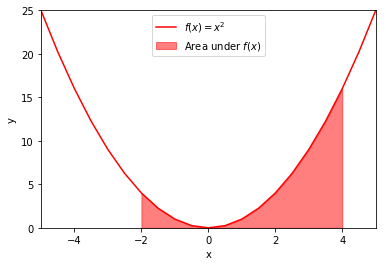

In [11]:
my_a = -2
my_b = 4

print(analyticIntegral(my_a, my_b))

pylab.figure()
pylab.plot(x, y, c='Red', label='$f(x) = x^2$')
pylab.fill_between(x, y, where=np.logical_and(x >= my_a, x <= my_b), color='red', alpha=0.5, label='Area under $f(x)$')
pylab.xlim(-5, 5)
pylab.ylim(0, 25)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.legend(loc='upper center')

## Numeric Integrals

Let's evaluate numeric integrals a few different ways

In [12]:
def numericIntegral(func, a, b, n_steps):
    """
    Simple numeric integration routine.
    """
    x = np.linspace(a, b, n_steps + 1) 
    dx = (b - a) / float(n_steps + 1)
    return np.sum(func(x) * dx)

In [13]:
print(numericIntegral(myFunction, my_a, my_b, 100))

24.359999999999996


Let's see how the accuracy improves as we add more steps.


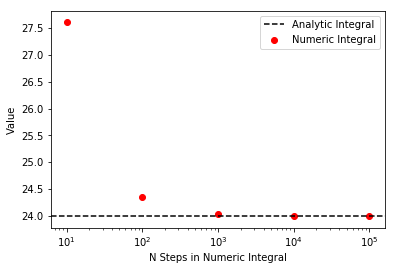

In [14]:
n_steps = 10**np.arange(1, 6).astype(int)
value = np.empty(len(n_steps))
for ii in range(0, len(n_steps)):
    value[ii] = numericIntegral(myFunction, my_a, my_b, n_steps[ii])

pylab.figure()
pylab.xscale('log')
pylab.axhline(analyticIntegral(my_a, my_b), c='black', ls='--', label='Analytic Integral')
pylab.scatter(n_steps, value, c='red', label='Numeric Integral')
pylab.xlabel('N Steps in Numeric Integral')
pylab.ylabel('Value')
pylab.legend(loc='upper right')

Rather than plotting the value of the integral directly, a more informative plot might be the fractional error relative to the analytic result.

/usr/local/lib/python3.4/dist-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


(1e-06, 1)

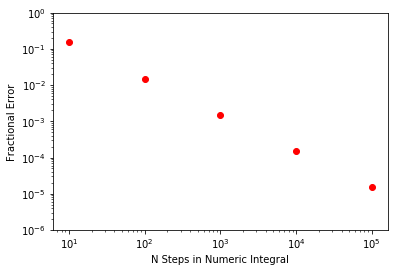

In [15]:
pylab.figure()
pylab.xscale('log')
pylab.yscale('log')
pylab.axhline(0, c='black', ls='--', label='')
pylab.scatter(n_steps, np.fabs(value / analyticIntegral(my_a, my_b)) - 1., c='red')
pylab.xlabel('N Steps in Numeric Integral')
pylab.ylabel('Fractional Error')
pylab.ylim(1.e-6, 1)

In principle, by adding more and more steps, we approach near-perfect accuracy. However, there is a cost in compute time.

In [16]:
import timeit

average_time = np.empty(len(n_steps))
n_trials = 1000

print("%10s%15s"%("N_steps", "Avg Time (s)"))
setup = "from __main__ import numericIntegral, myFunction, my_a, my_b"
for ii in range(0, len(n_steps)):
    command = "numericIntegral(myFunction, my_a, my_b, %i)"%(n_steps[ii])
    average_time[ii] = timeit.timeit(command, 
                                     setup=setup, 
                                     number=n_trials) / n_trials
    print("%10i%15.3e"%(n_steps[ii], average_time[ii]))

   N_steps   Avg Time (s)
        10      7.329e-05
       100      7.233e-05
      1000      7.025e-05
     10000      1.286e-04
    100000      1.640e-02


Text(0,0.5,'Average Time (s)')

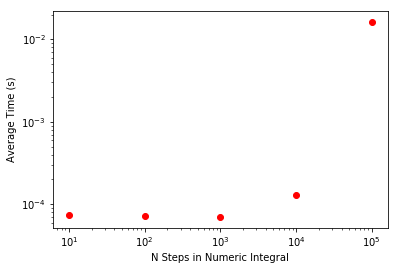

In [17]:
pylab.figure()
pylab.xscale('log')
pylab.yscale('log')
pylab.scatter(n_steps, average_time, c='red')
pylab.xlabel('N Steps in Numeric Integral')
pylab.ylabel('Average Time (s)')

## Built-in Python Integration Routines

We used a very simple approach in our homebrew numeric integration example above. It turns out that we can get substantially better accuracy and performance using python's built-in integration library [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

In [18]:
import scipy.integrate

First, let's check the accuracy.

In [19]:
value, absolute_error_estimate = scipy.integrate.quad(myFunction, my_a, my_b)
print('Value = %g\nAbsolute Error Estimate = %g'%(value, absolute_error_estimate))

Value = 24
Absolute Error Estimate = 2.66454e-13


In [20]:
setup = "from __main__ import scipy, myFunction, my_a, my_b"
n_trials = 1000

command = "scipy.integrate.quad(myFunction, my_a, my_b)"%(n_steps[ii])
average_time = timeit.timeit(command, setup=setup, number=n_trials) / n_trials
print("Average time = %.3e s"%(average_time))

Average time = 1.674e-05 s


Wow - much more accurate and much faster!

## Exercises

Good work making it this far! For further practice, try evaluating the next two integrals numerically and compare your result with the analytic answer. The second integral has an exact value which can be computed analytically, but requires some judgement to approach numerically.

(1) $\int_0^1 e^x dx$

(2) $\int_{-\infty}^1 e^x dx$